In [3]:
import numpy as np
import matplotlib.pyplot as plt
from keras import models
from keras import layers
from keras.datasets import reuters
%matplotlib inline

In [4]:
#加载路透社新闻数据集
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)
#每个样本都是一个整数列表，代表单词索引
#每个标签是一个整数，代表类别, 共64种

2121728/2110848 [==============================] - 1s 0us/step


C:\Users\李伟豪\AppData\Roaming\Python\Python38\site-packages\keras\datasets\reuters.py:143: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\李伟豪\AppData\Roaming\Python\Python38\site-packages\keras\datasets\reuters.py:144: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [7]:
#将数据向量化
def vectorize_sequences(sequences, dimension = 10000):
    result = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        result[i, sequence] = 1
    return result

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [8]:
#将标签向量化
def to_one_hot(labels, dimension = 46):
    result = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        result[i, label] = 1
    return result

one_hot_train_labels = to_one_hot(train_labels) 
one_hot_test_labels = to_one_hot(test_labels)

In [9]:
#建立模型
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(64, activation = 'relu', ))
model.add(layers.Dense(46, activation = 'softmax'))   #这一层使用了softmax激活，网络将输出在每个类别上的概率分布

In [10]:
#编译模型
model.compile(optimizer= 'rmsprop',
             loss = 'categorical_crossentropy',     #对于多分类问题使用分类交叉熵作为损失函数
             metrics= ['accuracy'])

In [14]:
#取1000个作为验证集
x_train_part = x_train[1000: ]
x_val = x_train[:1000]
y_train_part = one_hot_train_labels[1000:]
y_val = one_hot_train_labels[:1000]

In [15]:
#训练模型
history = model.fit(x_train_part, y_train_part, epochs=20, batch_size = 512, validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 13s 40ms/step - loss: 3.1672 - accuracy: 0.3911 - val_loss: 1.7815 - val_accuracy: 0.6590
Epoch 2/20
16/16 [==============================] - 0s 15ms/step - loss: 1.5210 - accuracy: 0.7069 - val_loss: 1.3236 - val_accuracy: 0.7180
Epoch 3/20
16/16 [==============================] - 0s 15ms/step - loss: 1.0771 - accuracy: 0.7819 - val_loss: 1.1310 - val_accuracy: 0.7640
Epoch 4/20
16/16 [==============================] - 0s 15ms/step - loss: 0.8296 - accuracy: 0.8303 - val_loss: 1.0323 - val_accuracy: 0.7870
Epoch 5/20
16/16 [==============================] - 0s 15ms/step - loss: 0.6596 - accuracy: 0.8676 - val_loss: 0.9540 - val_accuracy: 0.8020
Epoch 6/20
16/16 [==============================] - 0s 15ms/step - loss: 0.5299 - accuracy: 0.8944 - val_loss: 0.9325 - val_accuracy: 0.8030
Epoch 7/20
16/16 [==============================] - 0s 15ms/step - loss: 0.3994 - accuracy: 0.9198 - val_loss: 0.8924 - val_accuracy: 0.8140
Epoch 8/20
1

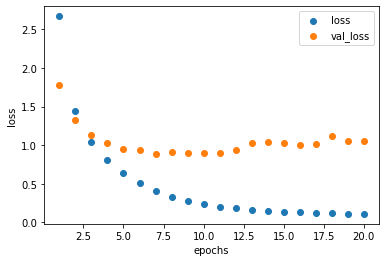

In [21]:
#绘制图像
epochs = range(1, len(history.history['loss'])+1)
plt.scatter(epochs, history.history['loss'], label = 'loss')
plt.scatter(epochs, history.history['val_loss'], label = 'val_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

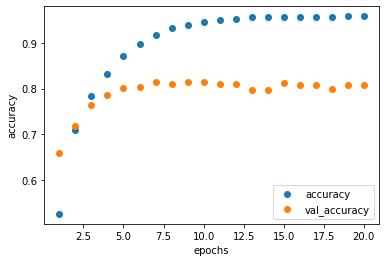

In [24]:
plt.scatter(epochs, history.history['accuracy'], label = 'accuracy')
plt.scatter(epochs, history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

In [31]:
#在第九轮之后出现了过拟合，重新训练一个九轮的模型
#建立模型
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(64, activation = 'relu', ))
model.add(layers.Dense(46, activation = 'softmax'))   #这一层使用了softmax激活，网络将输出在每个类别上的概率分布
#编译模型
model.compile(optimizer= 'rmsprop',
             loss = 'categorical_crossentropy',     #对于多分类问题使用分类交叉熵作为损失函数
             metrics= ['accuracy'])
#训练模型
history = model.fit(x_train_part, y_train_part, epochs=9, batch_size = 512, validation_data=(x_val, y_val))

result = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 1s 30ms/step - loss: 3.0526 - accuracy: 0.4054 - val_loss: 1.6830 - val_accuracy: 0.6600
Epoch 2/9
16/16 [==============================] - 0s 16ms/step - loss: 1.4647 - accuracy: 0.7091 - val_loss: 1.2678 - val_accuracy: 0.7230
Epoch 3/9
16/16 [==============================] - 0s 15ms/step - loss: 1.0415 - accuracy: 0.7776 - val_loss: 1.0973 - val_accuracy: 0.7600
Epoch 4/9
16/16 [==============================] - 0s 16ms/step - loss: 0.7921 - accuracy: 0.8307 - val_loss: 1.0505 - val_accuracy: 0.7620
Epoch 5/9
16/16 [==============================] - 0s 16ms/step - loss: 0.6399 - accuracy: 0.8648 - val_loss: 0.9323 - val_accuracy: 0.8060
Epoch 6/9
16/16 [==============================] - 0s 18ms/step - loss: 0.4982 - accuracy: 0.8981 - val_loss: 0.8887 - val_accuracy: 0.8190
Epoch 7/9
16/16 [==============================] - 0s 15ms/step - loss: 0.4039 - accuracy: 0.9172 - val_loss: 0.8923 - val_accuracy: 0.8120
Epoch 8/9
16/16 [===